# Analyse Exploratoire des Données

## La consommation d'énergie

### Analyse de la forme

### Analyse du fond 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv('../../raw_data/data_energy.csv',index_col="Date", parse_dates=True)

In [3]:
data.shape

(3417, 23)

In [4]:
data.columns

Index(['Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30'],
      dtype='object')

In [5]:
data.isna().sum()

Code INSEE région      0
Consommation (MW)      0
Thermique (MW)         0
Nucléaire (MW)         0
Eolien (MW)            0
Solaire (MW)           0
Hydraulique (MW)       0
Pompage (MW)           0
Bioénergies (MW)       0
Ech. physiques (MW)    0
Stockage batterie      0
Déstockage batterie    0
Eolien terrestre       0
Eolien offshore        0
TCO Thermique (%)      0
TCH Thermique (%)      0
TCO Nucléaire (%)      0
TCH Nucléaire (%)      0
TCO Eolien (%)         0
TCH Eolien (%)         0
TCO Solaire (%)        0
TCH Solaire (%)        0
Column 30              0
dtype: int64

In [6]:
pd.set_option('display.max_column', 23)
data.head()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30
Date,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,4464,257058.278726,15175.0,0.0,372.0,405.0,61254.0,-4.0,1808.0,173268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,4464,280064.000000,18369.0,0.0,1404.0,2655.0,70681.0,-12.0,1717.0,185143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,4464,285526.000000,24755.0,0.0,626.0,2984.0,72282.0,0.0,2357.0,182412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,4464,286799.000000,17085.0,0.0,1028.0,2570.0,68995.0,0.0,2988.0,194018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,4464,267848.000000,15479.0,0.0,1557.0,2898.0,62143.0,0.0,3051.0,182618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
addition = data['Thermique (MW)'] +  data['Eolien (MW)'] +  data['Solaire (MW)'] +  data['Hydraulique (MW)'] +  data['Pompage (MW)'] +  data['Bioénergies (MW)'] + data['Ech. physiques (MW)']
ecart = addition - data['Consommation (MW)']
print(ecart.min)
print(ecart.max)

<bound method NDFrame._add_numeric_operations.<locals>.min of Date
2013-01-01   -4780.278726
2013-01-02    -107.000000
2013-01-03    -110.000000
2013-01-04    -115.000000
2013-01-05    -102.000000
                 ...     
2022-05-11       6.000000
2022-05-12      16.000000
2022-05-13      15.000000
2022-05-14       5.000000
2022-05-15      -2.000000
Length: 3417, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.max of Date
2013-01-01   -4780.278726
2013-01-02    -107.000000
2013-01-03    -110.000000
2013-01-04    -115.000000
2013-01-05    -102.000000
                 ...     
2022-05-11       6.000000
2022-05-12      16.000000
2022-05-13      15.000000
2022-05-14       5.000000
2022-05-15      -2.000000
Length: 3417, dtype: float64>


In [8]:
data.loc[data["Nucléaire (MW)"]>0,:]

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30
Date,,,,,,,,,,,,,,,,,,,,,,,


In [9]:
nucleaire = data.loc[data["TCO Nucléaire (%)"]>0,:]
pd.set_option('display.max_column', 23)
nucleaire.head()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30
Date,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,4464,283815.0,35036.0,0.0,996.0,1751.0,29305.0,-765.0,5335.0,212159.0,581.44,1057.51,0.0,0.0,16.68,1026.81,28.72,121.93,497.00,895.37,90.50,1766.60,0.0
2021-01-02,4464,294157.0,62666.0,0.0,2000.0,1364.0,30977.0,-153.0,5326.0,191984.0,998.76,1891.51,0.0,0.0,32.61,2061.87,20.76,95.00,505.68,946.48,87.54,1763.55,0.0
2021-01-03,4464,296424.0,30498.0,0.0,1962.0,3043.0,30438.0,-459.0,4957.0,225996.0,475.82,920.53,0.0,0.0,32.40,2022.71,47.10,211.90,492.34,929.97,80.75,1641.38,0.0
2021-01-04,4464,320426.0,82025.0,0.0,276.0,997.0,52963.0,0.0,5115.0,179054.0,1226.03,2475.83,0.0,0.0,4.33,284.56,13.94,69.43,777.35,1618.20,77.16,1693.68,0.0
2021-01-05,4464,327553.0,92019.0,0.0,423.0,3744.0,59492.0,-153.0,5204.0,166836.0,1350.14,2777.53,0.0,0.0,6.05,436.05,53.23,260.71,863.85,1817.68,76.62,1723.12,0.0


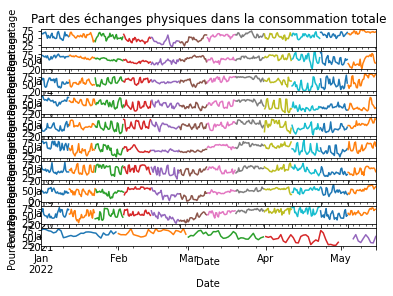

In [10]:
plt.rcParams["figure.figsize"]=[9,9]
plt.subplot(10, 1, 1)
plt.title("Part des échanges physiques dans la consommation totale")

Part_ech_phy =  (data['Ech. physiques (MW)'] / data['Consommation (MW)'])*100
Part_ech_phy['2013'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 2)
Part_ech_phy['2014'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 3)
Part_ech_phy['2015'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 4)
Part_ech_phy['2016'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 5)
Part_ech_phy['2017'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 6)
Part_ech_phy['2018'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 7)
Part_ech_phy['2019'].resample('M').plot( ylabel='Pourcentage')
plt.subplot(10, 1, 8)
Part_ech_phy['2020'].resample('M').plot( ylabel='Pourcentage')
plt.subplot(10, 1, 9)
Part_ech_phy['2021'].resample('M').plot(ylabel='Pourcentage')
plt.subplot(10, 1, 10)
Part_ech_phy['2022'].resample('M').plot(ylabel='Pourcentage')
plt.show()

In [11]:
df = pd.DataFrame(nucleaire[[ 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore']])
print(df.sum(axis=1))

Date
2021-01-01    285455.95
2021-01-02    297054.27
2021-01-03    297831.35
2021-01-04    324131.86
2021-01-05    331692.67
                ...    
2022-02-24    258140.14
2022-02-25    258915.86
2022-02-26    251540.50
2022-02-27    256947.77
2022-02-28    269539.13
Length: 424, dtype: float64


In [12]:
df = pd.DataFrame(nucleaire[[ 'TCO Thermique (%)',
       'TCO Nucléaire (%)', 'TCO Eolien (%)', 'TCO Solaire (%)']])
#'TCO Thermique (%)', 'TCH Thermique (%)','TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)','TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)'
print(df.sum(axis=1))

Date
2021-01-01    632.90
2021-01-02    646.59
2021-01-03    652.59
2021-01-04    872.78
2021-01-05    999.75
               ...  
2022-02-24    873.14
2022-02-25    983.54
2022-02-26    935.75
2022-02-27    766.93
2022-02-28    819.49
Length: 424, dtype: float64


In [13]:
#data['Consommation (MW)']
#data.loc['2020-01-25' : '2020-02-05','Consommation (MW)']
data.loc['2020-02-25' : '2020-03-05','Consommation (MW)']
#data.loc['2020-03-25' : '2020-04-05','Consommation (MW)']
#data.loc['2020-04-25' : '2020-05-05','Consommation (MW)']
#data.loc['2020-05-25' : '2020-06-05','Consommation (MW)']

Date
2020-02-25    235439.0
2020-02-26    250677.0
2020-02-27    276847.0
2020-02-28    261791.0
2020-02-29    258027.0
2020-03-01    241786.0
2020-03-02    261953.0
2020-03-03    267935.0
2020-03-04    270715.0
2020-03-05    272830.0
Name: Consommation (MW), dtype: float64

In [14]:
data.loc['2021-01' : '2021-06','TCO Nucléaire (%)']

Date
2021-01-01     28.72
2021-01-02     20.76
2021-01-03     47.10
2021-01-04     13.94
2021-01-05     53.23
               ...  
2021-06-26    431.54
2021-06-27    381.75
2021-06-28    323.42
2021-06-29    377.39
2021-06-30    423.06
Name: TCO Nucléaire (%), Length: 181, dtype: float64

In [15]:
data.dropna().count()


Code INSEE région      3417
Consommation (MW)      3417
Thermique (MW)         3417
Nucléaire (MW)         3417
Eolien (MW)            3417
Solaire (MW)           3417
Hydraulique (MW)       3417
Pompage (MW)           3417
Bioénergies (MW)       3417
Ech. physiques (MW)    3417
Stockage batterie      3417
Déstockage batterie    3417
Eolien terrestre       3417
Eolien offshore        3417
TCO Thermique (%)      3417
TCH Thermique (%)      3417
TCO Nucléaire (%)      3417
TCH Nucléaire (%)      3417
TCO Eolien (%)         3417
TCH Eolien (%)         3417
TCO Solaire (%)        3417
TCH Solaire (%)        3417
Column 30              3417
dtype: int64

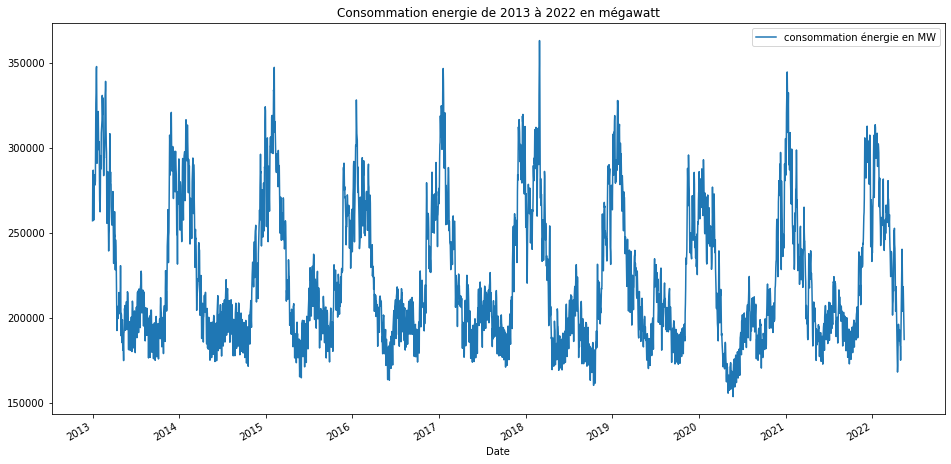

In [16]:
data['Consommation (MW)'].plot(figsize=(16,8), label='consommation énergie en MW', title='Consommation energie de 2013 à 2022 en mégawatt')
plt.legend()
plt.show()

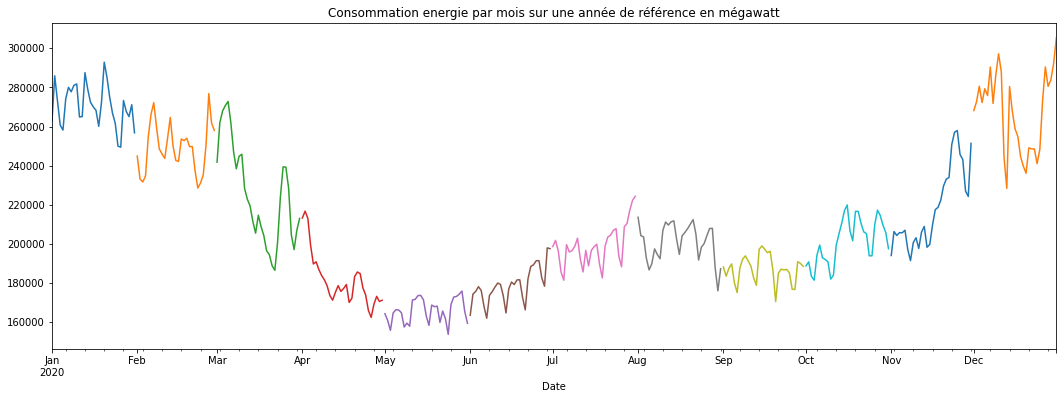

In [17]:
data['Consommation (MW)']['2020'].resample("M").plot(figsize=(18,6))
plt.title('Consommation energie par mois sur une année de référence en mégawatt')
#data.loc['2020-01' : '2020-02','Consommation (MW)'].resample("M").plot(figsize=(16,8))    #PLAGE DE REFERENCE
#data['Consommation (MW)']['2020'].hist(figsize=(18,6))                                    #HISTOGRAMME
plt.show()

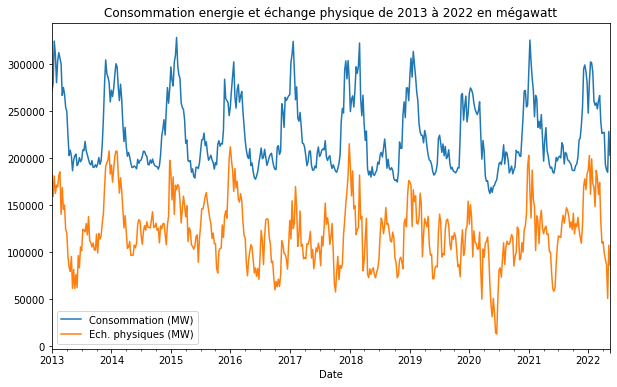

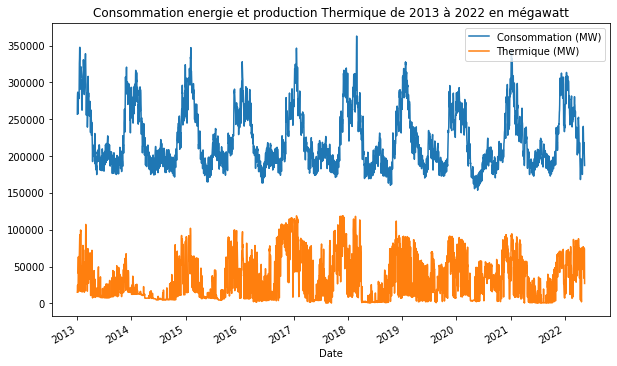

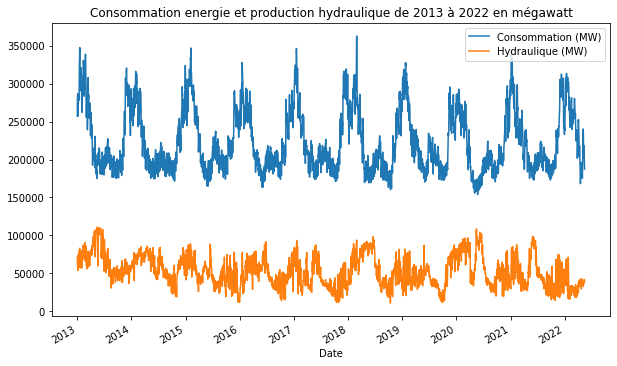

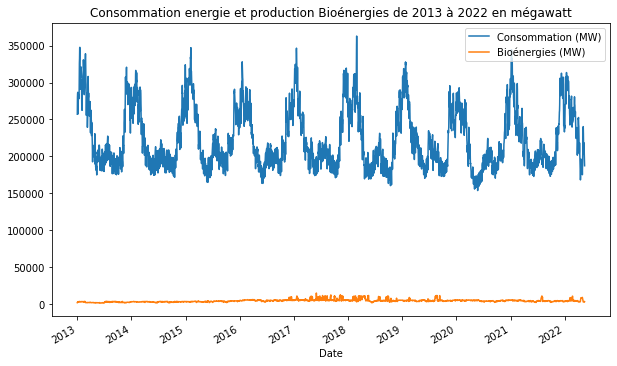

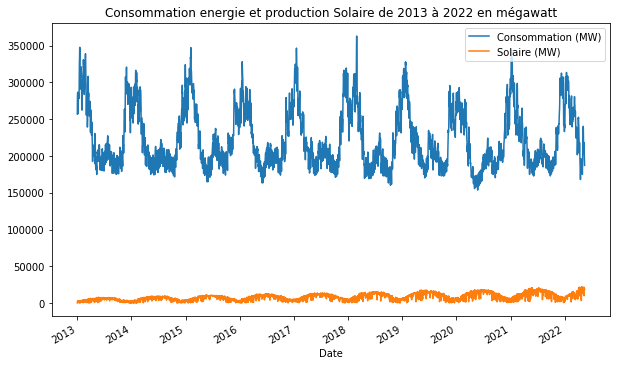

In [18]:
data[['Consommation (MW)','Ech. physiques (MW)']].resample('W').mean().plot(figsize=(10,6), title='Consommation energie et échange physique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)','Thermique (MW)']].plot(figsize=(10,6), title='Consommation energie et production Thermique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Hydraulique (MW)']].plot(figsize=(10,6), title='Consommation energie et production hydraulique de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Bioénergies (MW)']].plot(figsize=(10,6), title='Consommation energie et production Bioénergies de 2013 à 2022 en mégawatt')
data[['Consommation (MW)', 'Solaire (MW)']].plot(figsize=(10,6), title='Consommation energie et production Solaire de 2013 à 2022 en mégawatt')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'sho'

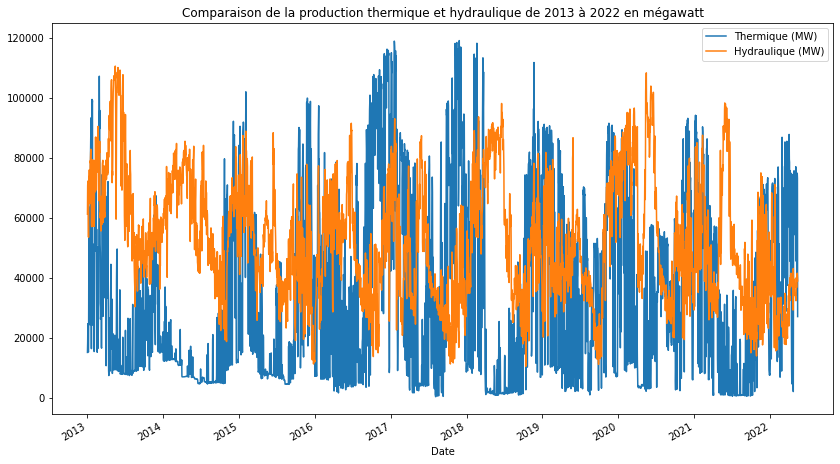

In [19]:
data[['Thermique (MW)','Hydraulique (MW)']].plot(figsize=(14,8), title='Comparaison de la production thermique et hydraulique de 2013 à 2022 en mégawatt')
plt.sho

In [ ]:
data.loc['2018' : '2020','Thermique (MW)'].plot(figsize=(16,8))
data.loc['2018' : '2020','Hydraulique (MW)'].plot(figsize=(16,8))

plt.title('Comparaison de la production thermique et hydraulique mégawatt sur une période de référence')
plt.show()

In [ ]:
data[['Thermique (MW)','Hydraulique (MW)']].corr()

Représentations graphiques  des différentes productions d'énergie en %

In [ ]:
data[['TCO Thermique (%)']].plot(figsize=(8,4))
data[['TCH Thermique (%)']].plot(figsize=(8,4))
data[['TCO Nucléaire (%)']].plot(figsize=(8,4))
data[['TCH Nucléaire (%)']].plot(figsize=(8,4))
data[['TCO Eolien (%)']].plot(figsize=(8,4))
data[[ 'TCH Eolien (%)']].plot(figsize=(8,4))
data[['TCO Solaire (%)']].plot(figsize=(8,4))
data[['TCH Solaire (%)']].plot(figsize=(8,4))

In [ ]:
data.info()

In [ ]:
data[['Consommation (MW)', 'Thermique (MW)', 'Solaire (MW)', 'Hydraulique (MW)','Bioénergies (MW)', 'Ech. physiques (MW)']].describe()

In [ ]:
plt.rcParams["figure.figsize"]=[9,9]
plt.subplot(3, 1, 1)
data[['Consommation (MW)']].boxplot()
plt.subplot(3, 1, 2)
data[['Ech. physiques (MW)']].boxplot()
plt.subplot(3, 1, 3)
data[['Thermique (MW)', 'Hydraulique (MW)']].boxplot()
plt.tight_layout()

## Les prévisions météoroliques

### Analyse de la forme

### Analyse du fond 

In [ ]:
df_weather_clean = pd.read_csv('../../raw_data/df_weather_clean.csv',index_col="Date", parse_dates=True)
df_weather_clean.head()

In [ ]:
df_weather_clean.shape

In [ ]:
df_weather_clean.columns

Définition des titres des colonnes:

In [ ]:
df_weather_clean.isna().sum()

In [ ]:
df_weather_clean[['T2M','TS']].plot(df_energy_weather['T2M'])
plt.show()

In [ ]:
df_weather_clean[['T2M','TS']].head()

In [ ]:
df_weather_clean[['T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN']].corr()

In [ ]:
sns.heatmap(df_weather_clean[['T2M', 'T2MDEW', 'T2MWET', 'TS',
       'T2M_RANGE', 'T2M_MAX', 'T2M_MIN']].corr())


In [ ]:
sns.heatmap(df_weather_clean[['RH2M', 'PRECTOTCORR', 'PS','WS10M', 'WS50M']].corr())

In [ ]:
sns.set_style("whitegrid")
df_weather_clean = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=df_weather_clean);

## Etude la consommation selon la météo

### Analyse de la forme

### Analyse du fond 

In [ ]:
df_energy_weather = pd.read_csv('../../raw_data/df_energy_weather.csv',index_col="Date", parse_dates=True)

In [ ]:
df_energy_weather.head()

In [ ]:
df_energy_weather["add"] = df_energy_weather['Thermique (MW)'] +  df_energy_weather['Eolien (MW)'] +  df_energy_weather['Solaire (MW)'] +  df_energy_weather['Hydraulique (MW)'] +  df_energy_weather['Pompage (MW)'] +  df_energy_weather['Bioénergies (MW)'] + df_energy_weather['Ech. physiques (MW)']
df_energy_weather['ecart'] = add - df_energy_weather['Consommation (MW)']
print(df_energy_weather['ecart'].min)
print(df_energy_weather['ecart'].max)

In [ ]:
df_energy_weather.shape

In [ ]:
df_energy_weather.info()

In [ ]:
df_energy_weather.columns

In [ ]:
df_energy_weather[['T2M', 'Consommation (MW)']].corr()

In [ ]:
sns.heatmap(df_energy_weather[['T2M', 'Consommation (MW)']].corr())

In [ ]:
sns.heatmap(df_energy_weather[['Consommation (MW)', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M']].corr())

In [ ]:
df_energy_weather[['Consommation (MW)', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M']].corr()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
t = np.arange(2018, 2020)
data1 = df_energy_weather['Consommation (MW)']
data2 = df_energy_weather['T2M']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot( data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('T2M', color=color)  # we already handled the x-label with ax1
ax2.plot( data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
df_energy_weather['Consommation (MW)'].shape

In [ ]:
df_energy_weather['T2M'].shape

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

#plt.figure(figsize=(18,6))
t = np.arange(2018, 2020)

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Années")
#host.set_xlim(2018, 2020)
#host.set_xlim(2018, 2020)
#ax.set_xticks(df_energy_weather['Date'])
host.set_ylabel("Consommation en MW")
par.set_ylabel("Temperature")

p1, = host.plot(df_energy_weather['Consommation (MW)'], label="Consommation en MW")
p2, = par.plot(df_energy_weather['T2M'], label="Temperature en °C")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()

In [ ]:
np.unique(df_energy_weather['Consommation (MW)']) 

In [ ]:
np.unique(df_energy_weather['T2M'])

In [ ]:
ener = np.array(df_energy_weather['Consommation (MW)'])

In [ ]:
ener.size

In [ ]:
temp = np.array(df_energy_weather['T2M'])

In [ ]:
temp.size

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[16,9]

# Create some mock data
t = df_energy_weather['Date']
data1 = ener
data2 = temp

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('année')
ax1.set_ylabel('Consommation (MW)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('T2M', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# GRAPHIQUES POUR PRESENTATION

In [ ]:
data.value_counts().plot.pie()

Consommation energie de 2013 à 2022 en mégawatt

In [ ]:
data['Consommation (MW)'].plot(figsize=(16,8), label='consommation énergie en MW', title='Consommation energie de 2013 à 2022 en mégawatt')
plt.legend()
plt.show()

Consommation energie par mois sur une année de référence en mégawatt

In [ ]:
data['Consommation (MW)']['2020'].resample("M").plot(figsize=(18,6))
plt.title('Consommation energie par mois sur une année de référence en mégawatt')
#data.loc['2020-01' : '2020-02','Consommation (MW)'].resample("M").plot(figsize=(16,8))    #PLAGE DE REFERENCE
#data['Consommation (MW)']['2020'].hist(figsize=(18,6))                                    #HISTOGRAMME
plt.show()

Part de la production dans la consommation d'énergie

In [ ]:
échange_physique = (data['Ech. physiques (MW)'] / data['Consommation (MW)'])*100
Thermique = (data['Thermique (MW)'] / data['Consommation (MW)'])*100
Hydraulique = (data['Hydraulique (MW)'] / data['Consommation (MW)'])*100
Eolien = (data['Eolien (MW)'] / data['Consommation (MW)'])*100
Solaire = (data['Solaire (MW)'] / data['Consommation (MW)'])*100
Bioénergies = (data['Bioénergies (MW)'] / data['Consommation (MW)'])*100
Nucléaire = (data['Nucléaire (MW)'] / data['Consommation (MW)'])*100
Pompage = (data['Pompage (MW)'] / data['Consommation (MW)'])*100

In [ ]:
Thermique['2021'].sum()            # 4595
échange_physique['2021'].sum()     # 21017
Hydraulique['2021'].sum()          # 8049
Solaire['2021'].sum()              # 2029
Bioénergies['2021'].sum()          # 702

In [ ]:
import plotly.express as px
RPA = np.array([4595,21017,8049,2029,702])
df = px.data.tips()
fig = px.pie(df,values=RPA,names=('Thermique (MW)','Ech. physiques (MW)','Hydraulique (MW)', 'Solaire (MW)','Bioénergies (MW)'),title='Répartition de la production énergétique en 2021')
fig.show()
#peut-etre choisir un an

In [ ]:
data.columns

In [ ]:
import plotly.express as px
x= data[['Consommation (MW)']]
fig = px.line(x)
fig.show()

In [ ]:
#h= data[['Hydraulique (MW)']].loc["2016"].resample('W').mean()                # de fev à juin 2018
h= data[['Hydraulique (MW)']]["2017":"2018"].resample('M').mean()                  # de fev. à juin 2020 - réduction production pendant 1er confinement
#h= data[['Hydraulique (MW)']]                                      # de 2013 à 2022
fig = px.line(h, title='Production hydraulique par rapport à la consommation totale')
fig.show()

#prendre deux ans

In [ ]:
E= data[['Eolien (MW)']].resample('M').mean()
fig = px.line(E)
fig.show()
#possibilité de mettre le vent???

In [ ]:
data[['Eolien (MW)']].max()

Evolution production thermique par rapport à la production d'énergie

In [ ]:

T=data[['Consommation (MW)','Thermique (MW)']]['2018':'2021'].resample('M').mean()
fig = px.line(T)
fig.show()
#montrer la consommation globale.
#on soutien notre conso gràce à la production du thermique

In [ ]:
data[['Consommation (MW)','Thermique (MW)']].corr()

Production "verte"

In [ ]:
production_verte = Eolien + Bioénergies + Solaire
production_verte.sum()

In [ ]:
PV=production_verte.resample('M').mean()
fig = px.line(PV)
fig.show()

In [ ]:
PVD=data[['Solaire (MW)','Bioénergies (MW)','Eolien (MW)']].resample('3M').mean()

fig = px.line(PVD)
fig.show()


In [ ]:
fig = px.line(data[['Consommation (MW)','Ech. physiques (MW)']].resample('S').mean())
fig.show()
# avec conso

In [ ]:
ech_th=data[['Ech. physiques (MW)','Thermique (MW)','Hydraulique (MW)' ]].resample('M').mean()

fig = px.line(ech_th)
fig.show()
#tester 2020 21